# Lecture 4: Logistic Regression with Binary Dependent Variable and Multiple Independent Variables

***

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">In this lecture we will be working on, univariate descriptive statistics and graphics, bivariate analysis (Chi-square) and last but not least multivariate binary logistic regression. </font>

## 1- Importing Dataset, Libraries and Data Organization </font>

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">First we will import the neccesarry libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import operator
import csv
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import ipywidgets as widgets
from IPython.display import HTML
import random

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We do not want to see undesired warnings in our report.</font>
<br>
<br>

In [2]:
warnings.filterwarnings('ignore')

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >In the following code cell we will create a function to hide/show code cells. Since some of the code cells that we will create in this tutorial is quite long especially the ones for the widgets. We will call this function inside the cells.</font>
<br>
<br>

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">We will use the same dataset that we used in the previous lecture The dataset is taken from <a href="url" target="_blank"> https://cses.org/data-download/cses-module-5-2016-2021/</a>  . All the necessary information about the dataset is given in the booklets at the website. Especially, reading the booklet about the variable names is recommended. Our dataset is in cvs format. 
<br>
<br>
</font>

In [3]:
#data = pd.read_csv(r'cses5.csv')
#data.info()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Our dataset columns has code names for variables. We will change the names in oder to simplify the understanding.</font>
<br>
<br>

In [4]:
#data = data.rename(columns={'E1006_NAM': 'country_name'})
#data = data.rename(columns={'E2002': 'gender'})
#data = data.rename(columns={'E2003': 'education'})
#data = data.rename(columns={'E2006': 'employement'})
#data = data.rename(columns={'E3012_PR_1': 'casted'})
#data = data.rename(columns={'E3024_4': 'closeness_party'})
#data = data.rename(columns={'E4006': 'turnout'})
#data = data.rename(columns={'E5075': 'women_in_parliament'})

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >Also, we get rid of the unnecessary variables to shrink the data, as shown in the previous info() command, it has 554 different variables (column entries). You can see the latest format of the dataset in the output below.</font>
<br>
<br>

In [5]:
#data1 = data[['country_name','casted', 'gender','education',
#        'employement', 'closeness_party','turnout','women_in_parliament']]

#data1.to_csv("data1_new.csv")
#data1

In [6]:
data1 = pd.read_csv(r'data1_new.csv') 
data1

,Unnamed: 0,country_name,casted,gender,education,employement,closeness_party,turnout,women_in_parliament
0,0,Australia,95,2,3,7,3,93.32,999.0
1,1,Australia,95,1,5,1,3,999.00,999.0
2,2,Australia,95,2,3,4,2,94.82,999.0
3,3,Australia,95,2,8,7,2,92.46,999.0
4,4,Australia,95,2,7,7,2,93.73,999.0
...,...,...,...,...,...,...,...,...,...
55510,55510,United States of America,1,1,4,6,9,58.30,19.4
55511,55511,United States of America,1,2,7,1,2,60.80,19.4
55512,55512,United States of America,1,1,3,7,9,60.80,19.4
55513,55513,United States of America,93,1,4,9,9,52.60,19.4


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > In the following cell, we will create a dictionary that use country names as dictionary keys. We will use this dictionary a lot in the remaining of the project. The main logic is spliting the total data by using country names. Therefore, we can use a country name to call all the data about this country.</font>
<br>
<br>

In [7]:
df_dict = {ct: data1[data1.country_name== ct].reset_index(drop=True) for ct in data1['country_name'].unique()}

turnout_list = {}
count = {}
b = 0
for country in df_dict.keys():
    count[country]=0
    for i in range(len(df_dict[country]['turnout'])):
        if df_dict[country]['turnout'][i] == 997 or df_dict[country]['turnout'][i] == 999:
            df_dict[country]['turnout'][i] = 0
            count[country] = count[country] + 1
            
    b = sum(df_dict[country]['turnout'])
    if b == 0.0:
        b = 0.000001
        count[country] = len(df_dict[country])-1
    turnout_list[country] =  b/(len(df_dict[country])- count[country])

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Before starting the calculations, we need to cleanse the data set. Since missing informations are determined, we need to get rid of them. For instance, a missing information in turnout data is given with <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>'997'</b></font> and <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>'999'</b></font>.

In [8]:
for i in range(len(df_dict['Turkey']['education'])):
    if df_dict['Turkey']['education'][i] == 97 or df_dict['Turkey']['education'][i] == 98 or df_dict['Turkey']['education'][i] == 99:
        df_dict['Turkey']['education'][i] = -1
    elif df_dict['Turkey']['education'][i] == 96:
        df_dict['Turkey']['education'][i] = 0

for i in range(len(df_dict['Turkey']['closeness_party'])):
    if df_dict['Turkey']['closeness_party'][i] == 7 or df_dict['Turkey']['closeness_party'][i] == 8 or df_dict['Turkey']['closeness_party'][i] == 9:
        df_dict['Turkey']['closeness_party'][i] = -1

for i in range(len(df_dict['Turkey']['employement'])):
    if df_dict['Turkey']['employement'][i] == 13 or df_dict['Turkey']['employement'][i] == 14 or df_dict['Turkey']['employement'][i] == 97  or df_dict['Turkey']['employement'][i] == 98  or df_dict['Turkey']['employement'][i] == 99:
        df_dict['Turkey']['employement'][i] = -1

for i in range(len(df_dict['Turkey']['casted'])):
    if df_dict['Turkey']['casted'][i] == 93 or df_dict['Turkey']['casted'][i] ==  95 or df_dict['Turkey']['casted'][i] == 96  or df_dict['Turkey']['casted'][i] == 97  or df_dict['Turkey']['casted'][i] == 98 or df_dict['Turkey']['casted'][i] == 99:
        df_dict['Turkey']['casted'][i] = 0

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We can observe the clean data now</font>.

In [9]:
df_dict['Turkey']

,Unnamed: 0,country_name,casted,gender,education,employement,closeness_party,turnout,women_in_parliament
0,47428,Turkey,1,2,2,8,2,87.49,17.4
1,47429,Turkey,1,2,2,8,-1,87.49,17.4
2,47430,Turkey,1,1,4,6,2,87.49,17.4
3,47431,Turkey,1,1,4,1,1,87.49,17.4
4,47432,Turkey,0,2,4,6,2,87.49,17.4
...,...,...,...,...,...,...,...,...,...
1064,48492,Turkey,1,1,4,1,2,80.94,17.4
1065,48493,Turkey,1,1,4,1,2,80.94,17.4
1066,48494,Turkey,1,2,3,7,1,89.72,17.4
1067,48495,Turkey,1,2,2,8,1,89.72,17.4


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We will repeat the same process for United States of America since in the following parts, we will use the variable named : <b><i>Did respondent cast a ballot?</i></b> as binary (yes/no) dependent varible. Therefore, we need two countries with presidential election. (In order to observe turnout)

In [10]:
for i in range(len(df_dict['United States of America']['education'])):
    if df_dict['United States of America']['education'][i] == 97 or df_dict['United States of America']['education'][i] == 98 or df_dict['United States of America']['education'][i] == 99:
        df_dict['United States of America']['education'][i] = -1
    elif df_dict['United States of America']['education'][i] == 96:
        df_dict['United States of America']['education'][i] = 0

for i in range(len(df_dict['United States of America']['turnout'])):
    if df_dict['United States of America']['turnout'][i] == 997 or df_dict['United States of America']['turnout'][i] == 999:
        df_dict['United States of America']['turnout'][i] = 0

for i in range(len(df_dict['United States of America']['closeness_party'])):
    if df_dict['United States of America']['closeness_party'][i] == 7 or df_dict['United States of America']['closeness_party'][i] == 8 or df_dict['United States of America']['closeness_party'][i] == 9:
        df_dict['United States of America']['closeness_party'][i] = -1

for i in range(len(df_dict['United States of America']['employement'])):
    if df_dict['United States of America']['employement'][i] == 13 or df_dict['United States of America']['employement'][i] == 14 or df_dict['United States of America']['employement'][i] == 97  or df_dict['United States of America']['employement'][i] == 98  or df_dict['United States of America']['employement'][i] == 99:
        df_dict['United States of America']['employement'][i] = -1

for i in range(len(df_dict['United States of America']['casted'])):
    if df_dict['United States of America']['casted'][i] == 93 or df_dict['United States of America']['casted'][i] ==  95 or df_dict['United States of America']['casted'][i] == 96  or df_dict['United States of America']['casted'][i] == 97  or df_dict['United States of America']['casted'][i] == 98 or df_dict['United States of America']['casted'][i] == 99:
        df_dict['United States of America']['casted'][i] = 0

In [11]:
df_dict['United States of America']

,Unnamed: 0,country_name,casted,gender,education,employement,closeness_party,turnout,women_in_parliament
0,51867,United States of America,1,1,4,1,-1,56.8,19.4
1,51868,United States of America,1,1,7,1,-1,49.4,19.4
2,51869,United States of America,0,1,4,1,-1,53.3,19.4
3,51870,United States of America,1,1,4,1,-1,48.6,19.4
4,51871,United States of America,1,2,4,2,2,61.0,19.4
...,...,...,...,...,...,...,...,...,...
3643,55510,United States of America,1,1,4,6,-1,58.3,19.4
3644,55511,United States of America,1,2,7,1,2,60.8,19.4
3645,55512,United States of America,1,1,3,7,-1,60.8,19.4
3646,55513,United States of America,0,1,4,9,-1,52.6,19.4


## 2- Univariate Descriptive Graphs

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> In this part we will observe the plots of independent varibles that will be used in the following parts. We will start with the average turnouts of the selected countries.

In [12]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0,0,1,1])
countries = ['Turkey', 'United States of America']
turnouts = [turnout_list['Turkey'],turnout_list['United States of America']]
plt.title('Average Turnouts of the Selected Countries', fontsize=12, fontweight='bold', pad=20)
ax.bar(countries,turnouts, color = 'c', width = 0.4)
plt.ylabel('Average Turnouts (%)')

Text(0, 0.5, 'Average Turnouts (%)')

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> In the following cells, we will count the number of some variables to show in the plots.

In [13]:
count_female_s = 0
count_male_s = 0

for i in range(len(df_dict['United States of America']['gender'])):
    if df_dict['United States of America']['gender'][i] == 1:
        count_male_s = count_male_s + 1;
    elif df_dict['United States of America']['gender'][i] == 2:
        count_female_s = count_female_s + 1;

In [14]:
count_female_t = 0
count_male_t = 0

for i in range(len(df_dict['Turkey']['gender'])):
    if df_dict['Turkey']['gender'][i] == 1:
        count_male_t = count_male_t + 1;
    elif df_dict['Turkey']['gender'][i] == 2:
        count_female_t = count_female_t + 1;

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> Number of gender of respondents in the selected countries:

In [15]:
fig = plt.figure(figsize=(3, 3))
plt.subplot(2, 1, 1)
ax1 = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count_t = {count_male_t,count_female_t}
plt.title('Number of Male and Female Respondents in Turkey', fontsize=12, fontweight='bold', pad=20)
ax1.bar(gender,count_t, color = 'r', width = 0.4)
plt.ylabel('Count')

fig = plt.figure(figsize=(3, 3))
plt.subplot(2, 1, 1)
ax2 = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
count_s = {count_male_s,count_female_s }
plt.title('Number of Male and Female Respondents in USA', fontsize=12, fontweight='bold', pad=20)
ax2.bar(gender,count_s, color = 'b', width = 0.4)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> In the following cell we will count the number of casted and not casted respondents. Again, they are set as hidden default.

In [16]:
count_casted1_t = 0
count_casted0_t = 0
for i in range(len(df_dict['Turkey']['casted'])):
    if df_dict['Turkey']['casted'][i] == 1:
        count_casted1_t = count_casted1_t + 1
    elif df_dict['Turkey']['casted'][i] == 0:
        count_casted0_t = count_casted0_t + 1

count_casted1_s = 0
count_casted0_s = 0
for i in range(len(df_dict['United States of America']['casted'])):
    if df_dict['United States of America']['casted'][i] == 1:
        count_casted1_s = count_casted1_s + 1
    elif df_dict['United States of America']['casted'][i] == 0:
        count_casted1_s = count_casted1_s + 1

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> Number of casted and not casted respondents in the selected countries:

In [17]:
fig = plt.figure(figsize=(3, 3))
plt.subplot(2, 2, 1)
ax1 = fig.add_axes([0,0,1,1])
gender = ['Casted', 'Not Casted']
count_t = {count_casted1_t,count_casted0_t}
plt.title('Did Respondents Cast the Last Ballot in Turkey', fontsize=12, fontweight='bold', pad=20)
ax1.bar(gender,count_t, color = 'r', width = 0.4)
plt.ylabel('Count')

fig = plt.figure(figsize=(3, 3))
plt.subplot(2, 2, 2)
ax2 = fig.add_axes([0,0,1,1])
gender = ['Casted', 'Not Casted']
count_t = {count_casted1_s,count_casted1_s}
plt.title('Did Respondents Cast the Last Ballot in USA', fontsize=12, fontweight='bold', pad=20)
ax2.bar(gender,count_t, color = 'b', width = 0.4)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

## 3- Interactive Plot for Social Factors 

<br>
<font face="Helvetica" size="3px" color="#323752"> We will use an interactive widget to observe the desired graphs with selected independent variables. These social graph plots are created in the first lecture. Before starting to create our widgets, labels for graphs is given below.</font>
<br>

<br>
<font face="Helvetica" size="3px" color="#323752"> <b>Education Status</b>
<font face="Helvetica" size="2px" color="#323752">  
<ul>
  <li>01. ISCED LEVEL 0 - EARLY CHILDHOOD EDUCATION</li>
  <li>02. EMPLOYED - PART-TIME (15-32 HOURS WEEKLY)</li>
  <li>03. ISCED LEVEL 2 - LOWER SECONDAR</li>
  <li>04. ISCED LEVEL 3 - UPPER SECONDARY</li>
  <li>05. ISCED LEVEL 4 - POST-SECONDARY NON-TERTIARY</li>
  <li>06. ISCED LEVEL 5 - SHORT-CYCLE TERTIARY</li>
  <li>07. ISCED LEVEL 6 - BACHELOR OR EQUIVALENT</li>
  <li>08. ISCED LEVEL 7 - MASTER OR EQUIVALENT</li>
  <li>09. ISCED LEVEL 8 - DOCTORAL OR EQUIVALENT</li>
  <li>00. NONE (NO EDUCATION)</li>
  <li>-01. MISSING/NO INFORMATION</li> 
</ul>

<font face="Helvetica" size="3px" color="#323752"> <b>Degree of Closeness to Party</b>
<font face="Helvetica" size="2px" color="#323752">  
<ul>
  <li>1. VERY CLOSE</li>
  <li>2. SOMEWHAT CLOSE</li>
  <li>3. NOT VERY CLOSE</li>
  <li>-1. MISSING/NO INFORMATION</li>
</ul>

<font face="Helvetica" size="3px" color="#323752"> <b>Employement Status</b>
<font face="Helvetica" size="2px" color="#323752">  
<ul>
  <li>01. EMPLOYED - FULL-TIME (32 OR MORE HOURS WEEKLY)</li>
  <li>02. EMPLOYED - PART-TIME (15-32 HOURS WEEKLY)</li>
  <li>03. EMPLOYED - LESS THAN 15 HOURS</li>
  <li>04. HELPING FAMILY MEMBER</li>
  <li>05. UNEMPLOYED</li>
  <li>06. STUDENT, IN SCHOOL, IN VOCATIONAL TRAINING</li>
  <li>07. RETIRED</li>
  <li>08. HOUSEWIFE, HOME DUTIES</li>
  <li>09. PERMANENTLY DISABLED</li>
  <li>10. OTHERS, NOT IN THE LABOR FORCE</li>
  <li>-01. MISSING/NO INFORMATION</li> 
</ul>

<font face="Helvetica" size="3px" color="#323752"> <b>Gender</b>
<font face="Helvetica" size="2px" color="#323752">  
<ol>
  <li>MALE</li>
  <li>FEMALE</li>
</ol>

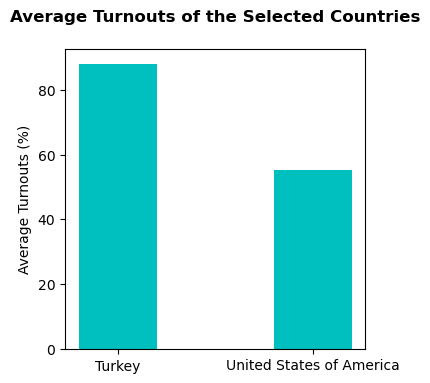

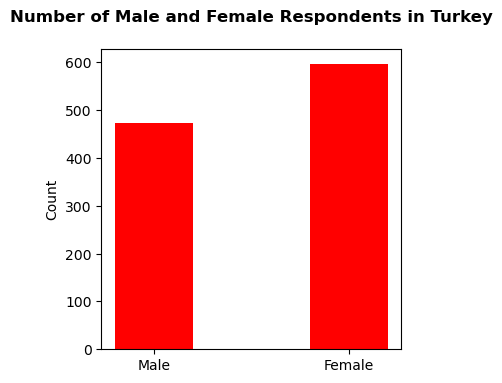

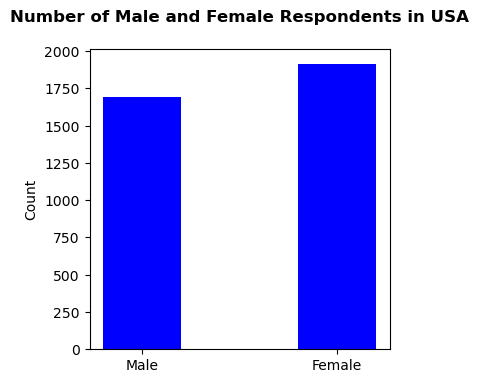

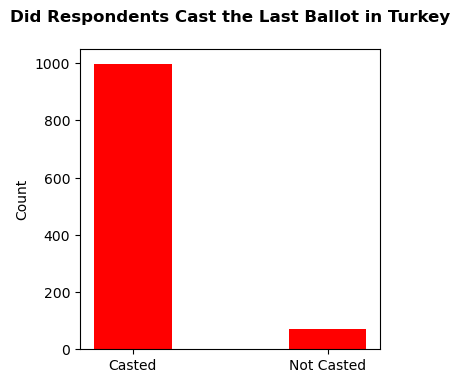

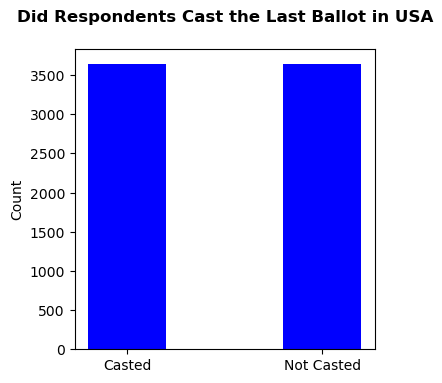

interactive(children=(Dropdown(description='Social Factors:', options=('Education Level', 'Closeness to a Pary…

In [18]:
a = widgets.Dropdown(
    options=['Education Level', 'Closeness to a Pary', 'Employement Status'],
    value='Education Level',
    description='Social Factors:',
    disabled=False,
    continuous_update=False
)

b = widgets.Dropdown(
    options=['Turkey', 'United States of America'],
    value='Turkey',
    description='Country:',
    disabled=False,
    continuous_update=False
)


c = widgets.Dropdown(
    options=['Total', 'Gender divided'],
    value='Total',
    description='Graph:',
    disabled=False,
    continuous_update=False
)

def social_graph(social,country,graph):
    if graph == 'Total':
        if social == "Education Level":
            plt.figure(figsize=(10, 5))
            sns.histplot( x='education', data=df_dict[country], stat="percent", discrete=True, kde=True);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Education Status of %s'%(country), fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('EDUCATION STATUS')
        
        elif social == "Closeness to a Pary":
            plt.figure(figsize=(10, 5))
            sns.histplot( x='closeness_party', data=df_dict[country],  stat="percent", discrete=True, kde=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Closeness to a Party in %s'%(country), fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Closeness to a Party')
            
        elif social == "Employement Status":
            plt.figure(figsize=(10, 5))
            sns.histplot( x='employement', data=df_dict[country],  stat="percent", discrete=True, kde=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Employment Status in Turkey', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Employment Status')
    
    elif graph == 'Gender divided':
        if social == "Education Level":
            plt.figure(figsize=(10, 5))
            sns.histplot( x='education', data=df_dict[country],alpha = .7 ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Education Status of Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('EDUCATION STATUS')
            plt.show()
        
        elif social == "Closeness to a Pary":
            plt.figure(figsize=(10, 5))
            sns.histplot( x='closeness_party', data=df_dict[country],alpha = .7
                        ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Closeness to a Party in Turkey with Genders', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Closeness to a Party ')
            plt.show()
            
        elif social == "Employement Status":
            plt.figure(figsize=(10, 5))
            sns.histplot( x='employement', data=df_dict[country],alpha = .7
                        ,hue = 'gender',  stat="percent", discrete=True, binwidth=1);
            sns.set_style("whitegrid", {'axes.grid' : False})
            plt.title('Employment Status in Switzerland with Genders', fontsize=20, fontweight='bold', pad=20);
            plt.xlabel('Employment Status')
            plt.show()
    
widgets.interact(social_graph, social=a, country=b, graph=c);     

## 4- Bivariate Analysis (Chi-square)

<br>
<font face="Helvetica" size="3px" color="#323752"> In this part we will implement the chi-square test that we used in the first lecture. Our aim is observing the dependency between the varibles 'casted' and 'closeness to party.' We will follow the same steps in the first lecture. We will choose only one country for this section (USA).

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We will create a table in the following cells with casted and degree of closeness to a party in USA. </font>
<br>
<br>

In [19]:
casted = [0]*4
not_casted = [0]*4
for i in range(len(df_dict['United States of America']['casted'])):
    if df_dict['United States of America']['closeness_party'][i] == 1:
        if df_dict['United States of America']['casted'][i] == 1:
            casted[0] = casted[0] + 1
        elif df_dict['United States of America']['casted'][i] == 0:
            not_casted[0] = not_casted[0] + 1
    if df_dict['United States of America']['closeness_party'][i] == 2:
        if df_dict['United States of America']['casted'][i] == 1:
            casted[1] = casted[1] + 1
        elif df_dict['United States of America']['casted'][i] == 0:
            not_casted[1] = not_casted[1] + 1
    if df_dict['United States of America']['closeness_party'][i] == 3:
        if df_dict['United States of America']['casted'][i] == 1:
            casted[2] = casted[2] + 1
        elif df_dict['United States of America']['casted'][i] == 0:
            not_casted[2] = not_casted[2] + 1
    if df_dict['United States of America']['closeness_party'][i] == -1:
        if df_dict['United States of America']['casted'][i] == 1:
            casted[3] = casted[3] + 1
        elif df_dict['United States of America']['casted'][i] == 0:
            not_casted[3] = not_casted[3] + 1

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > We are going to create sample data which is about gender and degree of closeness to a party in Switzerland. <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>Pandas </b></font>index and columns are used to name rows and columns. 
<br>
<br>

In [20]:
closeness_party = pd.DataFrame(
    [
        casted,
        not_casted
    ],
    index=["Casted","Not Casted"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"])

closeness_party

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Casted,564,1043,115,1098
Not Casted,78,166,27,557


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Python uses zero-based indexing. That means, the first element has an index 0, the second has index 1, and so on. If you want to access the fourth value in the <b>chi2_contingency(closeness_party)</b> you need to use <b>[3]</b>.</font>
<br>
<br>

### chi2_contingency

<br>
<font face="Helvetica" size="3px" color="#323752" > <font face="Helvetica" size="3.5px" color="#63b6c7" ><b>SciPy’s chi2_contingency() </b></font>returns four values, <b> 𝜒2 value, p-value, degree of freedom and expected values.</b> 
<br>
<br>

In [21]:
chi2_contingency(closeness_party)

(210.48078629608784,
 2.29230874277379e-45,
 3,
 array([[ 496.28289474,  934.58881579,  109.76973684, 1279.35855263],
        [ 145.71710526,  274.41118421,   32.23026316,  375.64144737]]))

### Expected values 

<br>
<font face="Helvetica" size="3px" color="#323752" > You can find the expected values at the forth in the returned value. It is in an array form. Let’s print the expected values. We again use the Pandas dataframe. We are going to add index and column values and round the values to the two decimal places <b>round(2)</b>. </font>
<br>
<br>

In [22]:
df=chi2_contingency(closeness_party)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["Casted","Not Casted"],
    columns=["Very Close","Somewhat Close","Not very Close","Missing/No Info"]).round(2)

,Very Close,Somewhat Close,Not very Close,Missing/No Info
Casted,496.28,934.59,109.77,1279.36
Not Casted,145.72,274.41,32.23,375.64


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > The table above is called <font face="Helvetica" size="3.5px" color="#63b6c7" ><b> a contingency table</b></font>.
<br>
<br>

### 𝜒2 value 

<br>
<font face="Helvetica" size="3px" color="#323752" > The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. This is what chi2_contingency is doing behind the scene. Since Python is 0 based index, in order to print the 𝜒2 we need to use <b>[0]</b>, which is the first value.</font>
<br>
<br>

In [23]:
chisquare=chi2_contingency(closeness_party)[0]
print(chisquare)

210.48078629608784


### p-Value 

<br>
<font face="Helvetica" size="3px" color="#323752" > You can find the p-value at the second in the returned value. p-value measures the probability of seeing the effect when the null hypothesis is true. So, when the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds.</font>
<br>
<br>

In [24]:
pvalue=chi2_contingency(closeness_party)[1]
print(pvalue)

2.29230874277379e-45


### Degree of freedom 

<br>
<font face="Helvetica" size="3px" color="#323752" >In the returned value from the chi2_contingency, the third one is the degree of freedom. We use <b>[2]</b> which is the third one. The following will output 3.</font>
<br>
<br>

In [25]:
dof=chi2_contingency(closeness_party)[2]
print(dof)

3


### Critical values 

<font face="Helvetica" size="3px" color="#323752" > The level of significance and degree of freedom can be used to find the critical value. As I mentioned, you can find the degree of freedom from the array. State and define probability from the level of significance, 1%, 5% 10%, etc.</font>
<br>
<br>

In [26]:
significance = 0.01
p = 1 - significance
dof = chi2_contingency(closeness_party)[2]
critical_value = chi2.ppf(p, dof)
print(critical_value)

11.344866730144373


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Let's check the p-value by using the critical value that we calculated </font>
<br>
<br>

In [27]:
p = chi2.cdf(critical_value, dof)
print(p)

0.99


<br>
<font face="Helvetica" size="3px" color="#323752" > Which confirms the critical value. </font>
<br>
<br>

### The Null and Alternative Hypotheses 

<font face="Helvetica" size="3px" color="#323752" >Chi-square test requires to state the null hypothesis, H0, and the alternative hypothesis, H1. The null hypothesis is the statement that our two variables are independent. The alternative hypothesis is the statement that they are not independent.</font>
<br>

<font face="Helvetica" size="3px" color="#323752" > If the calculated Chi-square is greater than the critical value we <b>reject the null hypothesis.</b></font>
<br>
<br>

In [28]:
chi, pval, dof, exp = chi2_contingency(closeness_party)
print('p-value is: ', pval)

significance = 0.001
p = 1 - significance

critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))

if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  2.29230874277379e-45
chi=210.480786, critical value=16.266236

At 0.00 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" > Alternatively, we can compare the p-value and the level of significance. If p-value < the level of significance, <b> we reject the null hypothesis.</b></font>
<br>
<br>

In [29]:
chi, pval, dof, exp = chi2_contingency(closeness_party)

significance = 0.01
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value=0.000000, significance=0.01

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We can observe the chi value and critical value on a chi-square distribution.

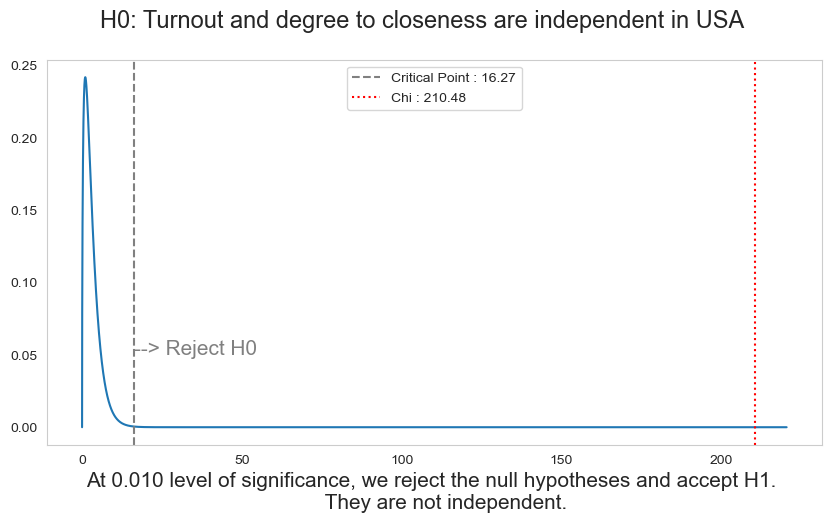

In [30]:
x = np.arange(0, chi + 10, 0.001)
a = chi2.pdf(x, df=dof)

plt.figure(figsize=(10, 5))
plt.plot(x, a)

plt.axvline(critical_value, 0, 1, color ='gray',linestyle='--', label='Critical Point : %.2f'%critical_value)
plt.axvline(chi, 0, 1, color ='red',linestyle=':', label='Chi : %.2f'%chi)
plt.text( critical_value, 0.05, '--> Reject H0', fontsize=15, color ='gray')
plt.suptitle("H0: Turnout and degree to closeness are independent in USA", fontsize=17)
if chi > critical_value:
    text = """At %.3f level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.""" % (significance)
else:
    text = """At %.3f level of significance, we accept the null hypotheses. 
    They are independent.""" % (significance)

plt.xlabel(text, fontsize=15)
plt.legend()
plt.show()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >As shown in the graph, those two social factor are clearly dependent. Chi value is so far away from the critial point.

## 5- Multivariate Binary Logistic Regression

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer. In our case, our dependent varible will be <b><i>"Did respondent cast a ballot?"</i></b> and the answer is yes or no.

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> We will start with selecting the feuture columns that will be used in the linear regression model. After selecting these columns, we will assing them as <b>X</b>, and the dependent varible 'casted' as <b>y</b>.

In [31]:
feature_cols = ['gender', 'education', 'employement', 'closeness_party','turnout']
X = df_dict['United States of America'][feature_cols]
y = df_dict['United States of America']['casted']


<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> In the following cell we will import the functions that will be used. 

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> With our training data created, I’ll up-sample the not-casted respondents using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
<br><br>
&nbsp;&nbsp;1) Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.<br>
&nbsp;&nbsp;    2) Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [33]:
os = SMOTE(random_state=0)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['casted'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['casted']==0]))
print("Number of subscription",len(os_data_y[os_data_y['casted']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['casted']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['casted']==1])/len(os_data_X))


length of oversampled data is  4224
Number of no subscription in oversampled data 2112
Number of subscription 2112
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> We have already imported the Logistic Regression module. It is time to create a Logistic Regression classifier object using LogisticRegression() function. Then, fit your model on the train set using fit() and perform prediction on the test set using predict(). Do not forget we are using the oversampled data.

In [34]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(os_data_X,os_data_y)
#logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">Next step is model evaluation and confusion matrix. A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [35]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[143,  61],
       [228, 480]], dtype=int64)

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, <b>143</b> and <b>480</b> are actual predictions, and <b>61</b> and <b>228</b> are incorrect predictions.

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.Here, you will visualize the confusion matrix using Heatmap.

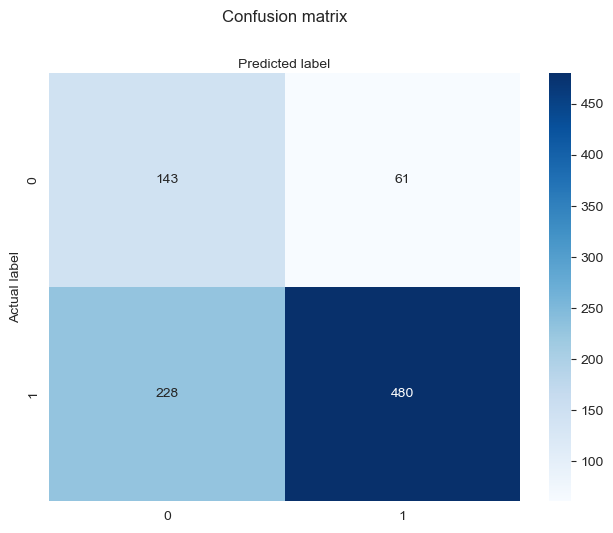

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

<br>
<br>
<font face="Helvetica" size="3px" color="#323752">Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall. 

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6831140350877193
Precision: 0.8872458410351202
Recall: 0.6779661016949152


<br>
<font face="Helvetica" size="3px" color="#323752">
Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. 
<br>
The other metic is Recall. If there are patients who are casted to a ballot in the test set and your Logistic Regression model can identify it 67% of the time.

<br>
<font face="Helvetica" size="3px" color="#323752"> Lets draw the <b> ROC curve </b>. Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

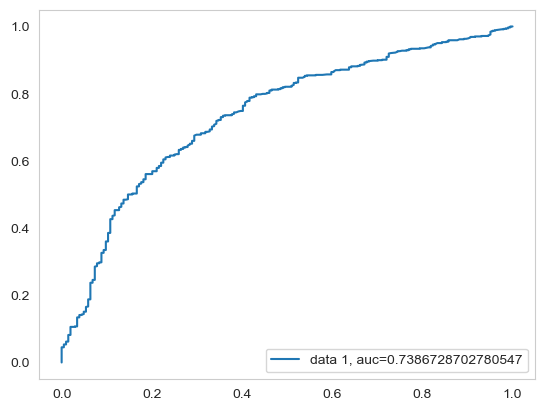

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752">AUC score for the case is 0.74. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

## 6- Interactive Logistic Regression Widgets

<br>
<font face="Helvetica" size="3px" color="#323752"> In this part, we use logistic regression widgets. We demonstrate simple logistic regression of single variable using interactive control elements. We will use single varible for the sake of simplicity of visualization.

<br>
<font face="Helvetica" size="3px" color="#323752"> Let's start with importing the widget functions.

In [39]:
from ipywidgets import interact, interactive, IntSlider, Layout

<br>
<font face="Helvetica" size="3px" color="#323752"> The following widgets  allow the user to introduce noise, change model complexity, and examine the impact of regularization, all on the fly and see the resulting model and predictions instantly.

<br>
<font face="Helvetica" size="3px" color="#323752"> The first widget will create data samples with different parameters. User can change the number of the data points, lower and upper limit of the range. Also magnitude, mean, and standard deviation of the noise are the other parameters that can be changed. Constructed data points will be spliting to test and training data in the following widget.

In [40]:
def func_log(N_samples,x_min,x_max,noise_magnitude,noise_sd,noise_mean):
    x= np.linspace(x_min,x_max,N_samples*5)
    x1= np.random.choice(x,size=N_samples)
    x2= np.random.choice(x,size=N_samples)
    y=1.5*x1-2*x2
    yn= y+noise_magnitude*np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    
    plt.figure(figsize=(8,5))
    c = [i < 0 for i in y]
    f, ax = plt.subplots(figsize=(8, 6))
    #ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    ax.set_xlim(left=x_min*1.2,right=x_max*1.2)
    ax.set_ylim(bottom=x_min*1.2,top=x_max*1.2)
    ax.scatter(x1,x2,c=c,edgecolors='k',s=80)
    plt.grid(True)
    plt.show()
    
    return (np.array(x),np.array(y),np.array(yn),np.array(x1),np.array(x2))


In [41]:
pl=interactive(func_log,N_samples={'Low (75 samples)':75,'High (250 samples)':200},x_min=(-5,0,1), x_max=(0,5,1),
              noise_magnitude=(0,5,1),noise_sd=(0.1,1,0.1),noise_mean=(-2,2,0.5))

pl

interactive(children=(Dropdown(description='N_samples', options={'Low (75 samples)': 75, 'High (250 samples)':…

In [42]:
xl,yl,ynl,x1l,x2l = pl.result
dic = {'X1':x1l,'X2':x2l,'out':ynl}
df = pd.DataFrame(data=dic)

def boolean (x):
    return int(x>0)
df['y']=df['out'].apply(boolean)
df.head()

,X1,X2,out,y
0,1.184492,-0.085561,3.583875,1
1,1.024064,0.288770,2.093391,1
2,-1.997326,-0.580214,-0.732329,0
3,0.516043,-0.058824,0.512931,1
4,-0.433155,0.689840,0.164315,1


In [43]:
def log_fit(C,test_size,penalty):
    
    X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']],df['y'],test_size=test_size,random_state=101)
    
    df_test=pd.DataFrame(X_test,columns=['X1','X2'])
    df_test['y']=y_test
    
    df_train=pd.DataFrame(X_train,columns=['X1','X2'])
    df_train['y']=y_train
    
    if (penalty=='L1 norm'):
        logm = LogisticRegressionCV(Cs=[np.power(10,-C)],penalty='l1',solver='saga')
    if (penalty=='L2 norm'):
        logm = LogisticRegressionCV(Cs=[np.power(10,-C)],penalty='l2',solver='lbfgs')
    
    logm.fit(X_train,y_train)
    
    train_score = logm.score(X_train,y_train)
    test_score = logm.score(X_test,y_test)
    
    xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = logm.predict_proba(grid)[:, 1].reshape(xx.shape)
        
    c_test = [i for i in df_test['y']]
    c_train = [i for i in df_train['y']]
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
    contour = ax[0].contourf(xx, yy, probs, 25, cmap="Blues",vmin=0, vmax=1)
    ax1_c = f.colorbar(contour)
    ax1_c.set_label("$Prob\ (y = 1)$",fontsize=15)
    ax1_c.set_ticks([0, .25, .5, .75, 1])
    ax[0].set_xlabel("$X_1$",fontsize=15)
    ax[0].set_ylabel("$X_2$",fontsize=15)
    ax[0].contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6,lw=3)
    
    ax[0].scatter(df_test['X1'],df_test['X2'],c=c_test,edgecolors='k',s=100)
    ax[0].set_title("\nTest score: %.3f\n"%(test_score),fontsize=20)
    
    contour = ax[1].contourf(xx, yy, probs, 25, cmap="Blues",vmin=0, vmax=1)
    #ax2_c = f.colorbar(contour)
    #ax2_c.set_label("$Prob\ (y = 1)$",fontsize=15)
    #ax2_c.set_ticks([0, .25, .5, .75, 1])
    ax[1].set_xlabel("$X_1$",fontsize=15)
    ax[1].set_ylabel("$X_2$",fontsize=15)
    ax[1].contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6,lw=3)
    
    ax[1].scatter(df_train['X1'],df_train['X2'],c=c_train,edgecolors='k',s=100)
    ax[1].set_title("\nTraining score: %.3f\n"%(train_score),fontsize=20)
        
    plt.grid(True)
    plt.tight_layout()
    plt.show()
      
    return (train_score,test_score)

<br>
<font face="Helvetica" size="3px" color="#323752">Let's talk about the following interactive hyperparameters.<b> Regularization</b>  is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error, basically complexity of the model (C: degree of the polynomial). The following one is <b> test fraction </b> which determines the size of the test set (fraction of total sample data used in test). And the last one is <b>regularization type</b>, L1: LASSO and L2: Ridge.   

<br>
<font face="Helvetica" size="3px" color="#323752"> You can observe the test and training scores by changing these parameters.

In [44]:
from ipywidgets import HBox, Label, FloatSlider

style = {'description_width': 'initial'}

lb1=Label (value="Play with options and watch the probability space evolve dynamically. \
Remember, smaller the value of $C$, stronger the regularization strength",fontsize=15)

logp=interactive(log_fit,C=FloatSlider(value=0,min=0,max=2,step=0.1,
                                       description='Regularization ($10^{-C}$), $C$', style=style,continuous_update=False),
                 test_size=FloatSlider(value=0.1,min=0.1,max=0.5,step=0.1,
                                       description = 'Test fraction ($X_{test}$)', style=style),
                penalty=widgets.RadioButtons(options=["L1 norm","L2 norm"], description = 'Penalty norm'))


output = logp.children[-1]
output.layout.height = '500px'
output.layout.width = '1000px'

lb1
logp

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Regularization ($10^{-C}$),…